## Case Study on Titanic Data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
td = pd.read_csv('train.csv', index_col = 0)

# one more way of setting the col as index
# td.set_index('PassengerId', inplace = True)
td.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [3]:
# Checking the last 3 rows of the Data set.
td.tail(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [96]:
# dropping the duplicate rows
a = td.drop_duplicates()
a.info()

# still 891 cols so there is no any duplicates. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [100]:
print(td.shape)
print(td.size)

(891, 11)
9801


In [53]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [40]:
# checking for the null values (any of the following method we can use)
# td.isna().sum()
td.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [48]:
# Find the percentage of null values from all cols.
td.isnull().sum() / td.count() * 100

Survived      0.000000
Pclass        0.000000
Name          0.000000
Sex           0.000000
Age          24.789916
SibSp         0.000000
Parch         0.000000
Ticket        0.000000
Fare          0.000000
Cabin       336.764706
Embarked      0.224972
dtype: float64

In [60]:
# Collecting the statistical info
td.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
# iclude = 'all' will help us get the all complete data set info (cat and num)
td.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Olsvigen, Mr. Thor Anderson",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [66]:
# The np.object will help us get only catogerical data info
td.describe(include = np.object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Olsvigen, Mr. Thor Anderson",male,347082,B96 B98,S
freq,1,577,7,4,644


In [92]:
# getting all cols names. 
td.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [103]:
# checking the unique values from the cols
for i in td.columns :
    print(i, '=\n', td[i].unique())

Survived =
 [0 1]
Pclass =
 [3 1 2]
Name =
 ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexande

In [106]:
# checking the survived info.
td['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [104]:
td.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### writing the quiries 


In [12]:

td[td['Name'] == 'Heikkinen, Miss. Laina' ][['Survived', 'Age' ]]

,Survived,Age
PassengerId,,
3,1,26.0


In [33]:
# Finding the max ticket value passngers. 
td[td.Fare == td.Fare.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


## Univariate analysis - exploring one column at a time

In [59]:
td['Pclass'].value_counts()

# By using value_count fn we can find number of different catogery values in  particular 

3    491
1    216
2    184
Name: Pclass, dtype: int64

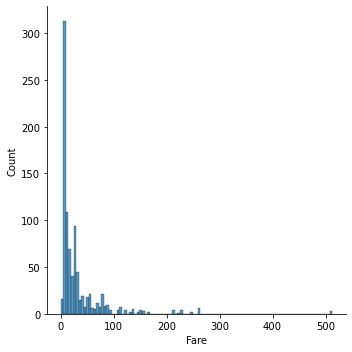

In [76]:
ax = sns.displot(x = 'Fare', data = td)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

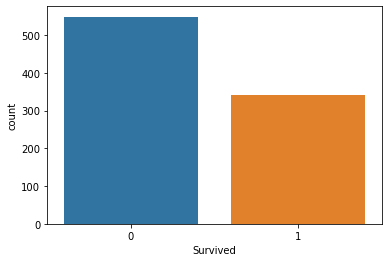

In [89]:
sns.countplot(data = td, x = 'Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

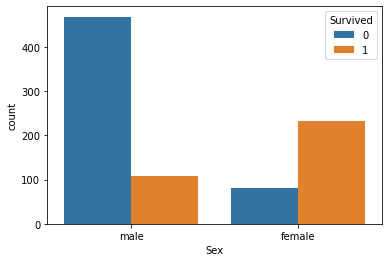

In [84]:
# hue fn will allow us to check plot the graph by adding third dimension.
sns.countplot(x = 'Sex', data = td, hue = 'Survived')

/home/shiva/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/shiva/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


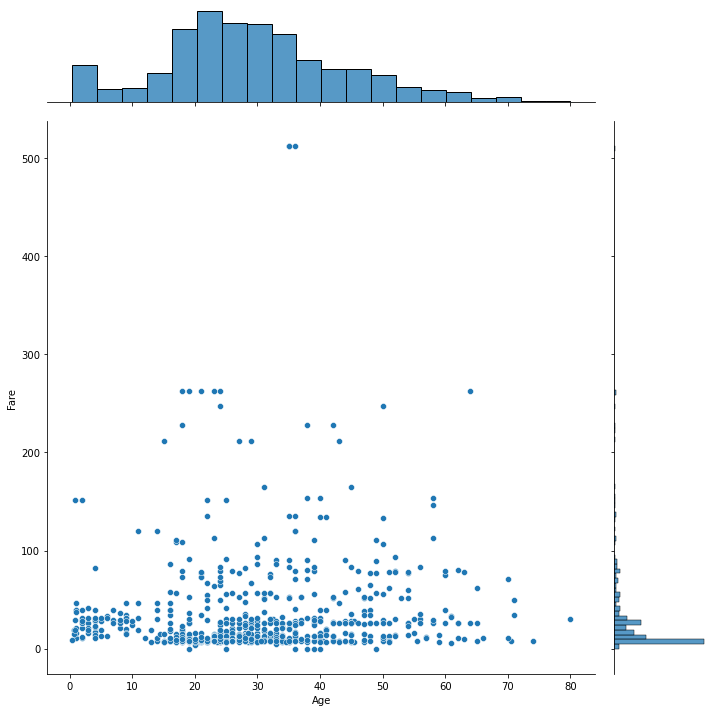

In [103]:
sns.jointplot(td.Age, td.Fare, size = 10)
plt.show()

# We get the same result from the below code.
# sns.jointplot(x = 'Age', y = 'Fare', data = td)

## Categorical plot (Which help us plot the graph cat vs num and we can use for num vs num also)

/home/shiva/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Age'>

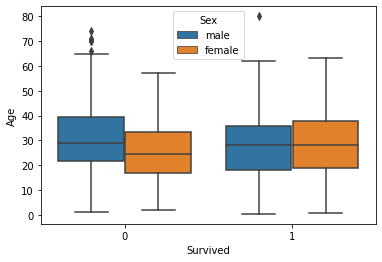

In [110]:
sns.boxplot(td.Survived, td.Age, hue = td.Sex)

/home/shiva/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='Age'>

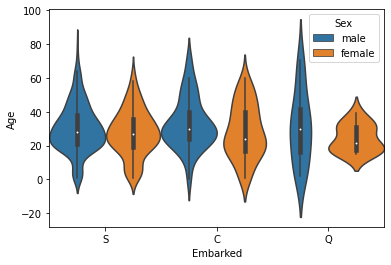

In [11]:
sns.violinplot(td.Embarked, td.Age,  hue = td.Sex, width = 1)

In [18]:
# Sorting the age in decending value.  
td.Age.sort_values(ascending =  False)

PassengerId
631    80.0
852    74.0
97     71.0
494    71.0
117    70.5
       ... 
860     NaN
864     NaN
869     NaN
879     NaN
889     NaN
Name: Age, Length: 891, dtype: float64

## The displot for age col including none value.

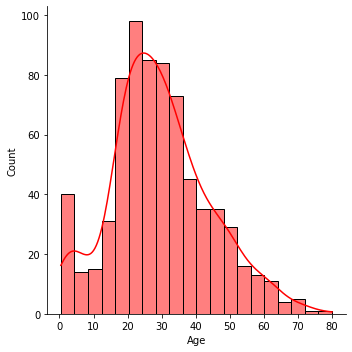

In [25]:
sns.displot(td.Age, kde = True, color = 'r')

In [20]:
td.Age.mean()

29.69911764705882

In [4]:
td1 = td.copy()

In [5]:
td1.Age.fillna(value = 29.69911764705882, inplace = True)

In [37]:
# After filling nan values checking the null values. 
td1.Age.isnull().sum()

0

## The displot for age col with replacing none values with mean age.

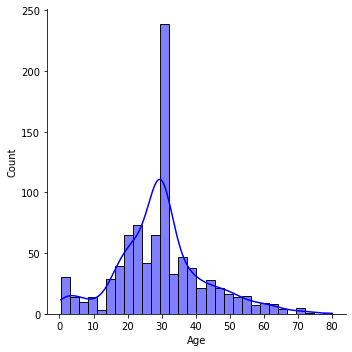

In [7]:
sns.displot(td1.Age, kde = True, color = 'b')

<AxesSubplot:>

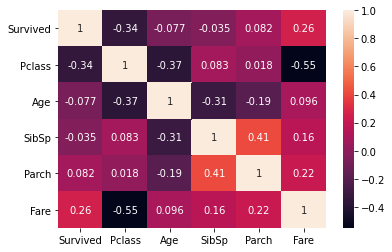

In [14]:
# By using corelation we checking how the things are corelated. 
sns.heatmap(td.corr(), annot = True)

<AxesSubplot:ylabel='PassengerId'>

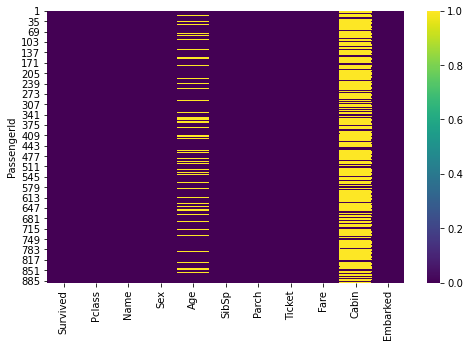

In [26]:
plt.subplots(figsize =(8, 5))
sns.heatmap(td.isnull(), cmap = 'viridis')
# cmap is to change the plot color.
# Here we can find more null values in 'cabin' and 'Age' columns.

In [17]:
# Droping few cols from the data set.
td.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
td.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [18]:
# We can add similar kind of cols. 
td['Family'] =  td['SibSp'] + td['Parch']


In [20]:
td.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1
2,1,1,female,38.0,1,0,71.2833,C,1
3,1,3,female,26.0,0,0,7.9250,S,0
4,1,1,female,35.0,1,0,53.1000,S,1
5,0,3,male,35.0,0,0,8.0500,S,0


In [24]:
# So now agian  we can drop two more cols.
td.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
td

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,S,1
2,1,1,female,38.0,71.2833,C,1
3,1,3,female,26.0,7.9250,S,0
4,1,1,female,35.0,53.1000,S,1
5,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
887,0,2,male,27.0,13.0000,S,0
888,1,1,female,19.0,30.0000,S,0
889,0,3,female,NaN,23.4500,S,3


## Categorical data to numerical conversation. 

In [76]:
emb =  pd.get_dummies(td['Embarked'])
emb.head()

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [77]:
# Dropig 'C' cols bcoz when Q & S are zero by default C is 1.
emb =  pd.get_dummies(td['Embarked'], drop_first = True)
emb.head()

,Q,S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1


In [61]:
td.drop(['Q', 'S', 'Q', 'S'], axis = 1, inplace = True)

In [63]:
td.drop(['female', 'male'], axis = 1, inplace = True)

In [64]:
td

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,S,1
2,1,1,female,38.0,71.2833,C,1
3,1,3,female,26.0,7.9250,S,0
4,1,1,female,35.0,53.1000,S,1
5,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
887,0,2,male,27.0,13.0000,S,0
888,1,1,female,19.0,30.0000,S,0
889,0,3,female,NaN,23.4500,S,3


In [65]:
# Concatenate with data frame. 
td = pd.concat([td, emb], axis  = 1)
td.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Q,S
PassengerId,,,,,,,,,
1,0,3,male,22.0,7.2500,S,1,0,1
2,1,1,female,38.0,71.2833,C,1,0,0
3,1,3,female,26.0,7.9250,S,0,0,1
4,1,1,female,35.0,53.1000,S,1,0,1
5,0,3,male,35.0,8.0500,S,0,0,1


In [38]:
sex_  = pd.get_dummies(td['Sex'])
sex_

,female,male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
...,...,...
887,0,1
888,1,0
889,1,0


In [66]:
td.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Q,S
PassengerId,,,,,,,,,
1,0,3,male,22.0,7.2500,S,1,0,1
2,1,1,female,38.0,71.2833,C,1,0,0
3,1,3,female,26.0,7.9250,S,0,0,1
4,1,1,female,35.0,53.1000,S,1,0,1
5,0,3,male,35.0,8.0500,S,0,0,1


In [70]:
sex_1 = pd.get_dummies(td['Sex'])
sex_1.head()

,female,male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


In [73]:
td = pd.concat([td, sex_1], axis  = 1)
td.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Q,S,female,male
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,7.2500,S,1,0,1,0,1
2,1,1,female,38.0,71.2833,C,1,0,0,1,0
3,1,3,female,26.0,7.9250,S,0,0,1,1,0
4,1,1,female,35.0,53.1000,S,1,0,1,1,0
5,0,3,male,35.0,8.0500,S,0,0,1,0,1


In [74]:
# Droping the sex cols bcoz the two new cols created for sex categorie (in zero and one)
td.drop(['Sex'], axis = 1, inplace = True)

In [78]:
td.drop(['Embarked'], axis = 1, inplace = True)

## Now the data set is ready to feed into ML model.

In [79]:
td.head()

,Survived,Pclass,Age,Fare,Family,Q,S,female,male
PassengerId,,,,,,,,,
1,0,3,22.0,7.2500,1,0,1,0,1
2,1,1,38.0,71.2833,1,0,0,1,0
3,1,3,26.0,7.9250,0,0,1,1,0
4,1,1,35.0,53.1000,1,0,1,1,0
5,0,3,35.0,8.0500,0,0,1,0,1
